In [ ]:
!pip install yfinance ta --quiet



In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from ta.momentum import RSIIndicator

plt.style.use('seaborn-v0_8-darkgrid')  # For better plots

In [ ]:
# Define your 10 selected NIFTY 50 stocks
stock_dict = {
    'HDFC Bank': 'HDFCBANK.NS',
    'Reliance': 'RELIANCE.NS',
    'Infosys': 'INFY.NS',
    'ITC': 'ITC.NS',
    'Tata Motors': 'TATAMOTORS.NS',
    'Sun Pharma': 'SUNPHARMA.NS',
    'L&T': 'LT.NS',
    'Bharti Airtel': 'BHARTIARTL.NS',
    'Bajaj Finance': 'BAJFINANCE.NS',
    'Tata Chemicals': 'TATACHEM.NS'
}

# Create a dictionary to hold data
stock_data = {}

for name, ticker in stock_dict.items():
    df = yf.download(ticker, start="2014-01-01", end="2024-12-31", progress=False)
    if not df.empty:
        # Access the 'Close' column using the MultiIndex
        df['RSI'] = RSIIndicator(close=df[('Close', ticker)], window=14).rsi()
        df.dropna(inplace=True)
        stock_data[name] = df
        print(f"{name} data loaded ✅")
    else:
        print(f"{name} data not available ❌")

/tmp/ipython-input-2057471868.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2014-01-01", end="2024-12-31", progress=False)
/tmp/ipython-input-2057471868.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2014-01-01", end="2024-12-31", progress=False)


HDFC Bank data loaded ✅
Reliance data loaded ✅


/tmp/ipython-input-2057471868.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2014-01-01", end="2024-12-31", progress=False)


Infosys data loaded ✅


/tmp/ipython-input-2057471868.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2014-01-01", end="2024-12-31", progress=False)


ITC data loaded ✅


/tmp/ipython-input-2057471868.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2014-01-01", end="2024-12-31", progress=False)


Tata Motors data loaded ✅


/tmp/ipython-input-2057471868.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2014-01-01", end="2024-12-31", progress=False)


Sun Pharma data loaded ✅


/tmp/ipython-input-2057471868.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2014-01-01", end="2024-12-31", progress=False)


L&T data loaded ✅


/tmp/ipython-input-2057471868.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2014-01-01", end="2024-12-31", progress=False)


Bharti Airtel data loaded ✅


/tmp/ipython-input-2057471868.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2014-01-01", end="2024-12-31", progress=False)


Bajaj Finance data loaded ✅


/tmp/ipython-input-2057471868.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2014-01-01", end="2024-12-31", progress=False)


Tata Chemicals data loaded ✅


In [ ]:
results = {}

for name, df in stock_data.items():
    df['Signal'] = 0
    df.loc[df['RSI'] < 30, 'Signal'] = 1   # Buy
    df.loc[df['RSI'] > 70, 'Signal'] = -1  # Sell

    df['Position'] = df['Signal'].replace(to_replace=0, method='ffill')
    df['Daily_Return'] = df['Close'].pct_change()
    df['Strategy_Return'] = df['Position'].shift(1) * df['Daily_Return']

    df['Cumulative_Market'] = (1 + df['Daily_Return']).cumprod()
    df['Cumulative_Strategy'] = (1 + df['Strategy_Return']).cumprod()

    results[name] = df[['Cumulative_Market', 'Cumulative_Strategy']]


/tmp/ipython-input-2078171271.py:8: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df['Position'] = df['Signal'].replace(to_replace=0, method='ffill')
/tmp/ipython-input-2078171271.py:8: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df['Position'] = df['Signal'].replace(to_replace=0, method='ffill')
/tmp/ipython-input-2078171271.py:8: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df['Position'] = df['Signal'].replace(to_replace=0, method='ffill')
/tmp/ipython-input-2078171271.py:8: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df['Position'] = df['Signal'].replace(to_replace=0, method='ffill')
/tmp/ipython-input-2078171271.py:8: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future vers

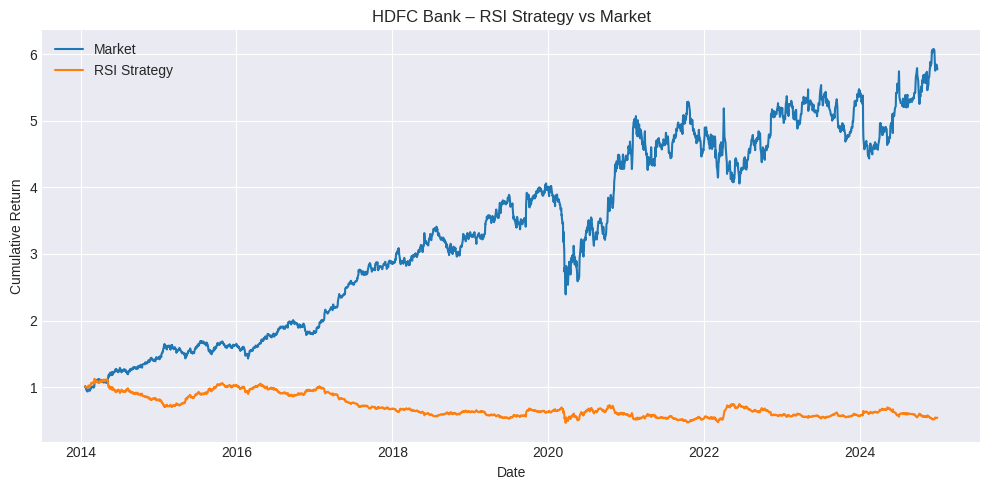

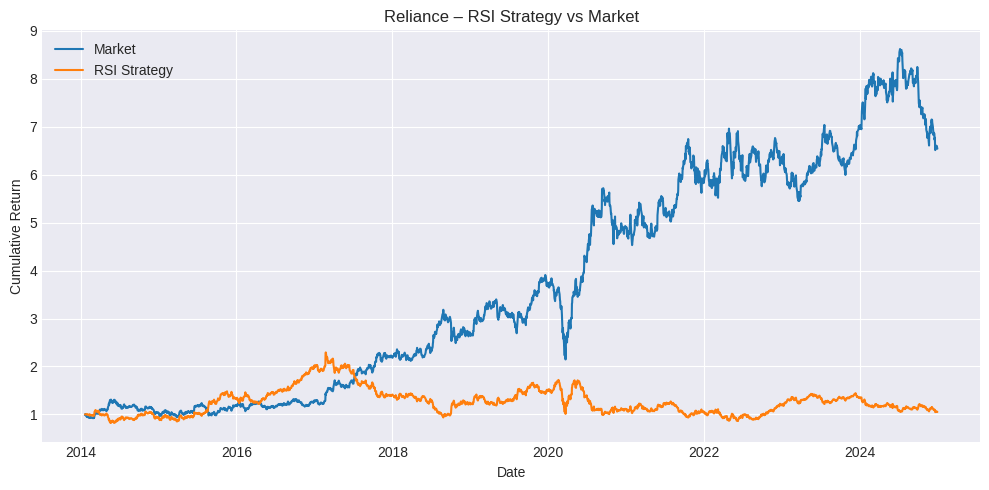

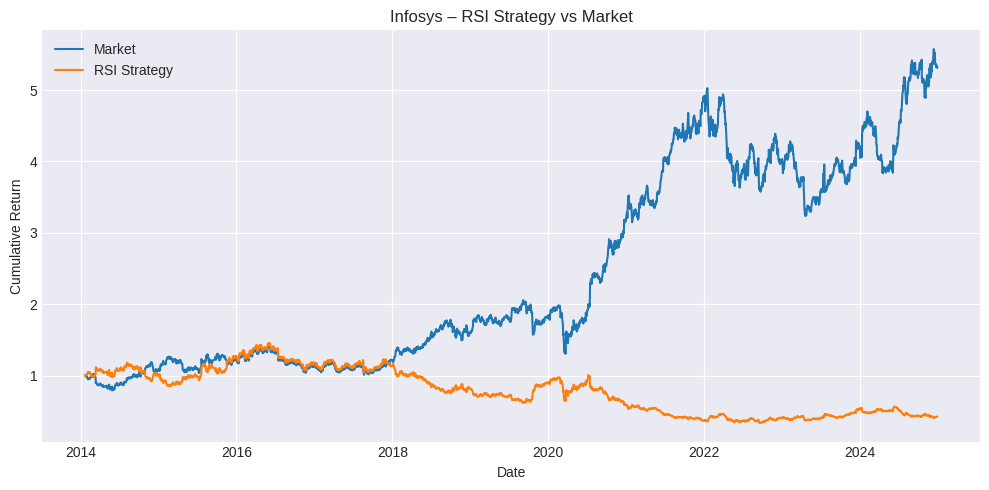

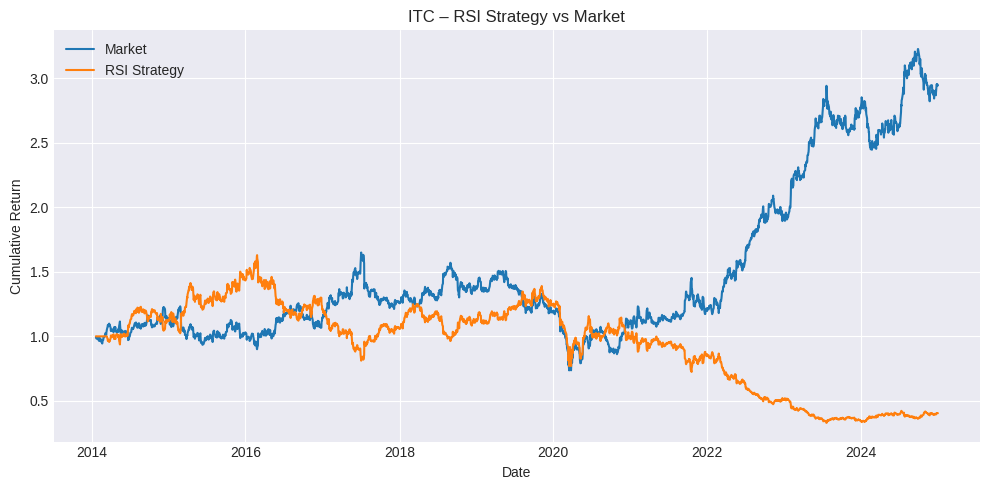

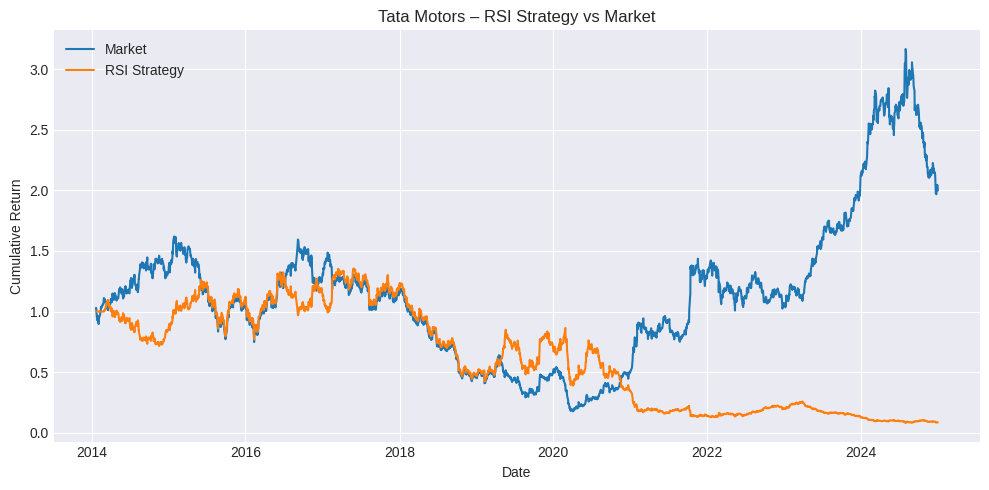

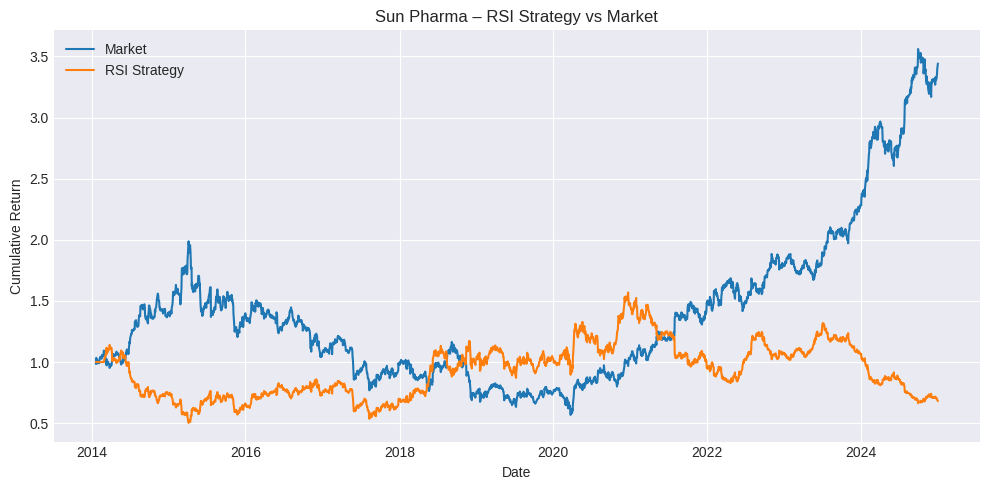

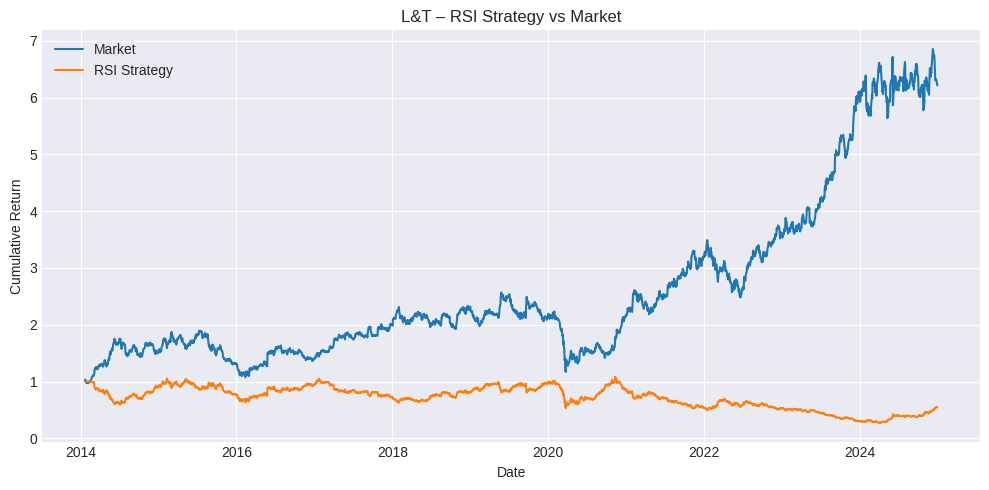

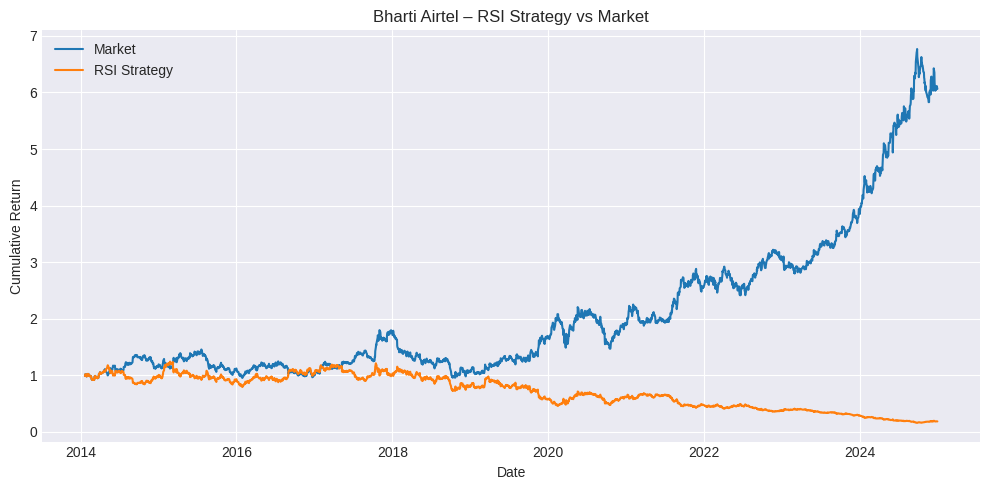

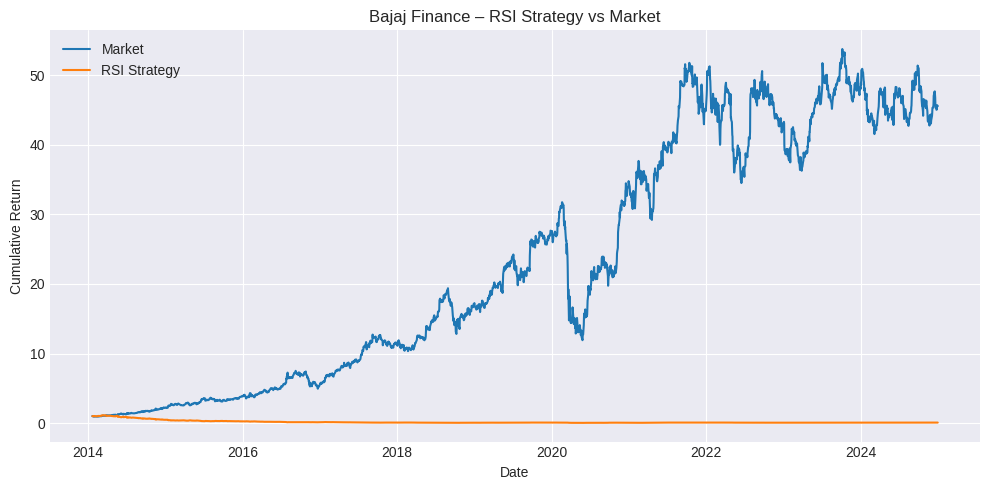

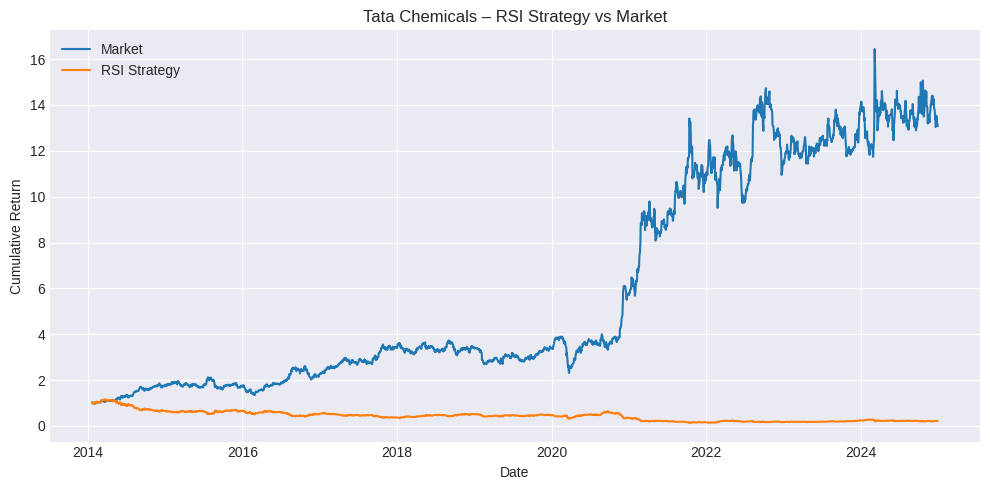

In [ ]:
for name, res in results.items():
    plt.figure(figsize=(10, 5))
    plt.plot(res['Cumulative_Market'], label='Market')
    plt.plot(res['Cumulative_Strategy'], label='RSI Strategy')
    plt.title(f"{name} – RSI Strategy vs Market")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from ta.momentum import RSIIndicator

# Define your 10 selected NIFTY 50 stocks
stock_dict = {
    'HDFC Bank': 'HDFCBANK.NS',
    'Reliance': 'RELIANCE.NS',
    'Infosys': 'INFY.NS',
    'ITC': 'ITC.NS',
    'Tata Motors': 'TATAMOTORS.NS',
    'Sun Pharma': 'SUNPHARMA.NS',
    'L&T': 'LT.NS',
    'Bharti Airtel': 'BHARTIARTL.NS',
    'Bajaj Finance': 'BAJFINANCE.NS',
    'Tata Chemicals': 'TATACHEM.NS'
}

# Create a dictionary to hold data
stock_data = {}

for name, ticker in stock_dict.items():
    df = yf.download(ticker, start="2014-01-01", end="2024-12-31", progress=False)
    if not df.empty:
        # Access the 'Close' column using the MultiIndex
        df['RSI'] = RSIIndicator(close=df[('Close', ticker)], window=14).rsi()
        df.dropna(inplace=True)
        stock_data[name] = df
        print(f"{name} data loaded ✅")
    else:
        print(f"{name} data not available ❌")


# Dictionary to hold performance summary
performance = []

for name, df in stock_data.items():
    df = df.copy()

    # Calculate Strategy_Return, Daily_Return, and Position
    df['Signal'] = 0
    df.loc[df['RSI'] < 30, 'Signal'] = 1   # Buy
    df.loc[df['RSI'] > 70, 'Signal'] = -1  # Sell

    df['Position'] = df['Signal'].replace(to_replace=0, method='ffill')
    df['Daily_Return'] = df['Close'].pct_change()
    df['Strategy_Return'] = df['Position'].shift(1) * df['Daily_Return']

    # Strategy performance
    daily_returns = df['Strategy_Return'].dropna()

    # Sharpe Ratio
    sharpe = (daily_returns.mean() / daily_returns.std()) * np.sqrt(252)

    # Max Drawdown
    cumulative = (1 + daily_returns).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    max_drawdown = drawdown.min()

    # Accuracy
    df['Actual'] = np.where(df['Daily_Return'] > 0, 1, -1)
    df['Predicted'] = df['Position'].shift(1)
    correct = df[df['Predicted'] != 0]
    accuracy = (correct['Actual'] == correct['Predicted']).mean()

    # Save the results
    performance.append({
        'Stock': name,
        'Sharpe Ratio': round(sharpe, 2),
        'Max Drawdown (%)': round(max_drawdown * 100, 2),
        'Accuracy (%)': round(accuracy * 100, 2)
    })

/tmp/ipython-input-3929220273.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2014-01-01", end="2024-12-31", progress=False)
/tmp/ipython-input-3929220273.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2014-01-01", end="2024-12-31", progress=False)
/tmp/ipython-input-3929220273.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2014-01-01", end="2024-12-31", progress=False)


HDFC Bank data loaded ✅
Reliance data loaded ✅
Infosys data loaded ✅


/tmp/ipython-input-3929220273.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2014-01-01", end="2024-12-31", progress=False)
/tmp/ipython-input-3929220273.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2014-01-01", end="2024-12-31", progress=False)
/tmp/ipython-input-3929220273.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2014-01-01", end="2024-12-31", progress=False)


ITC data loaded ✅
Tata Motors data loaded ✅
Sun Pharma data loaded ✅
L&T data loaded ✅


/tmp/ipython-input-3929220273.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2014-01-01", end="2024-12-31", progress=False)
/tmp/ipython-input-3929220273.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2014-01-01", end="2024-12-31", progress=False)
/tmp/ipython-input-3929220273.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2014-01-01", end="2024-12-31", progress=False)
/tmp/ipython-input-3929220273.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2014-01-01", end="2024-12-31", progress=False)


Bharti Airtel data loaded ✅
Bajaj Finance data loaded ✅
Tata Chemicals data loaded ✅


/tmp/ipython-input-3929220273.py:46: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df['Position'] = df['Signal'].replace(to_replace=0, method='ffill')
/tmp/ipython-input-3929220273.py:46: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df['Position'] = df['Signal'].replace(to_replace=0, method='ffill')
/tmp/ipython-input-3929220273.py:46: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df['Position'] = df['Signal'].replace(to_replace=0, method='ffill')
/tmp/ipython-input-3929220273.py:46: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df['Position'] = df['Signal'].replace(to_replace=0, method='ffill')
/tmp/ipython-input-3929220273.py:46: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future

In [ ]:
performance_df.to_csv("RSI_Strategy_Performance.csv", index=False)

In [ ]:
!pip install ta --quiet

  Preparing metadata (setup.py) ... done


In [ ]:
from google.colab import files

# Upload any CSV (like RSI_Strategy_Performance.csv)
uploaded = files.upload()


Saving BAJFINANCE.csv to BAJFINANCE.csv
Saving BHARTIARTL.csv to BHARTIARTL.csv
Saving HDFCBANK.csv to HDFCBANK.csv
Saving INFY.csv to INFY.csv
Saving ITC.csv to ITC.csv
Saving LT.csv to LT.csv
Saving RELIANCE.csv to RELIANCE.csv
Saving SUNPHARMA.csv to SUNPHARMA.csv
Saving TATACHEM.csv to TATACHEM.csv
Saving TATAMOTORS.csv to TATAMOTORS.csv


In [ ]:
import pandas as pd
import numpy as np
from ta.momentum import RSIIndicator
from sklearn.metrics import accuracy_score
from google.colab import files

# Stock name and file mapping
stock_files = {
    'HDFC Bank': 'HDFCBANK.csv',
    'Reliance': 'RELIANCE.csv',
    'Infosys': 'INFY.csv',
    'ITC': 'ITC.csv',
    'Tata Motors': 'TATAMOTORS.csv',
    'Sun Pharma': 'SUNPHARMA.csv',
    'L&T': 'LT.csv',
    'Bharti Airtel': 'BHARTIARTL.csv',
    'Bajaj Finance': 'BAJFINANCE.csv',
    'Tata Chemicals': 'TATACHEM.csv'
}

rsi_results = []

for stock_name, filename in stock_files.items():
    try:
        # Load and clean data
        df = pd.read_csv(filename)
        df.columns = [col.lower() for col in df.columns]
        df['date'] = pd.to_datetime(df['date'], errors='coerce')
        df.set_index('date', inplace=True)
        df['close'] = pd.to_numeric(df['close'], errors='coerce')
        df.dropna(subset=['close'], inplace=True)

        # RSI calculation
        df['rsi'] = RSIIndicator(close=df['close'], window=14).rsi()

        # Strategy: Buy when RSI < 30, Sell when RSI > 70
        df['signal'] = 0
        df.loc[df['rsi'] < 30, 'signal'] = 1  # Buy
        df.loc[df['rsi'] > 70, 'signal'] = -1  # Sell

        # Generate returns
        df['return'] = df['close'].pct_change()
        df['strategy_return'] = df['signal'].shift(1) * df['return']
        df.dropna(inplace=True)

        # Accuracy: predicting direction
        actual_direction = (df['return'] > 0).astype(int)
        predicted_direction = (df['signal'].shift(1) > 0).astype(int)
        predicted_direction = predicted_direction[df.index.isin(actual_direction.index)]
        accuracy = accuracy_score(actual_direction, predicted_direction)

        # Sharpe Ratio
        sharpe = (df['strategy_return'].mean() / df['strategy_return'].std()) * np.sqrt(252) if df['strategy_return'].std() != 0 else 0

        # Max Drawdown
        cum_returns = (1 + df['strategy_return']).cumprod()
        peak = cum_returns.cummax()
        drawdown = (peak - cum_returns) / peak
        max_dd = drawdown.max()

        # Append results
        rsi_results.append({
            'Stock': stock_name,
            'Accuracy': round(accuracy, 2),
            'Sharpe Ratio': round(sharpe, 2),
            'Max Drawdown (%)': round(max_dd * 100, 2)
        })

        print(f"✅ {stock_name} RSI strategy completed.")

    except Exception as e:
        print(f"❌ {stock_name} failed: {e}")


✅ HDFC Bank RSI strategy completed.
✅ Reliance RSI strategy completed.
✅ Infosys RSI strategy completed.
✅ ITC RSI strategy completed.
✅ Tata Motors RSI strategy completed.
✅ Sun Pharma RSI strategy completed.
✅ L&T RSI strategy completed.
✅ Bharti Airtel RSI strategy completed.
✅ Bajaj Finance RSI strategy completed.
✅ Tata Chemicals RSI strategy completed.


In [ ]:
rsi_df = pd.DataFrame(rsi_results)
rsi_df.to_csv('rsi_results.csv', index=False)
files.download('rsi_results.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
rsi_df

,Stock,Accuracy,Sharpe Ratio,Max Drawdown (%)
0,HDFC Bank,0.48,-0.09,40.74
1,Reliance,0.49,0.17,30.01
2,Infosys,0.48,0.16,27.80
3,ITC,0.49,-0.03,34.63
4,Tata Motors,0.51,-0.31,79.41
5,Sun Pharma,0.49,-0.17,43.18
6,L&T,0.50,-0.27,45.95
7,Bharti Airtel,0.50,0.49,15.71
8,Bajaj Finance,0.48,-0.23,64.39
9,Tata Chemicals,0.48,-0.60,73.54
